# Final Project: Predictive Model for Titanic Dataset

This assignment is done by using dataset that can be accessed on https://www.kaggle.com/c/titanic.

The goal of this project is to predict which passenger is survived during the past titanic accident. The prediction is conducted by creating a predictive model using machine learning.

First, import all the libraries that will be needed to conduct all the pre-processing stage, data analysis, and data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Then, load the data, both the training data and the testing data.

In [2]:
train = pd.read_csv(r"dataset/train.csv")
test = pd.read_csv(r"dataset/test.csv")

The information regarding the features in the datasets that we just loaded are as follows:
- Survived: Represent the survival of the passenger. (0 = Not Survived/Dead, 1 = Survived)
- PassengerId: The ID of the passenger
- Pclass: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
- Name: The name of the passenger
- Sex: Gender of the passenger
- SibSp: The number of siblings / spouses aboard the Titanic
- Parch: The number of of parents / children aboard the Titanic
- Ticket: Ticket number of each passenger
- Fare: Ticket fare of each passenger
- Cabin: Cabin number
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Check the first five data from both the training and testing data.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now, check the last five data from both the training and testing data.

In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Now, check the dimension of the dataset.

In [7]:
train.shape, test.shape

((891, 12), (418, 11))

The <font color=blue>__PassengerId__</font> column is basically the ID for each passenger. It means, for each passenger, the value of PassengerId must be distinct to one another.

In [8]:
train['PassengerId'].nunique(), test['PassengerId'].nunique()

(891, 418)

We can see that the number of unique value of <font color=blue>__PassengerId__</font> column is the same as the number of column that we have for each dataset that indicates our assumption above is true. So, we can set the PassengerId as the index of this dataset instead.

In [9]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

Define a function to know the number of unique value for each column of a dataset.

In [10]:
def number_of_unique(data):
    for col in data.columns:
        print(col, data[col].nunique())

Now, find out the number of unique value for each column of both training and testing data.

In [11]:
number_of_unique(train)

Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [12]:
number_of_unique(test)

Pclass 3
Name 418
Sex 2
Age 79
SibSp 7
Parch 8
Ticket 363
Fare 169
Cabin 76
Embarked 3


In [13]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
test.isnull().sum() 

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

- Similar to PassengerId, the number of unique value of <font color=blue>__Name__</font> column is also the same as the number of column that we have for each dataset. We wouldn't get any particular information from this column so we can just drop this column.
- <font color=blue>__Ticket__</font> also has many unique value that we couldn't get any particular information from this column so we can just drop this column.
- <font color=blue>__Cabin__</font> has so many missing values. If we impute certain values to the missing value of this column, it will lead the data of this column to be imbalance and the information that we get will not be valid. So, we can just drop this column.

In [15]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Check the information of __the data type for each column__ and __how many times that type of data appears__ in the dataset.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


Based on how many unique value for each column and the information above, for train dataset, we have:
- 4 columns with numerical data: Age, SibSp, Parch, and Fare.
- 4 columns with categorical data: Survived, Pclass, Sex, and Embarked.

We can also infer that Age and Embarked column have several missing values.

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


We can infer that Age and Fare column have several missing values.

Before we start to overcome the missing value, first check the distribution of <font color=blue>__Age__</font> column to estimate its mean, median, and mode. This estimation will help us to decide which value that is most suitable to fill the missing value.

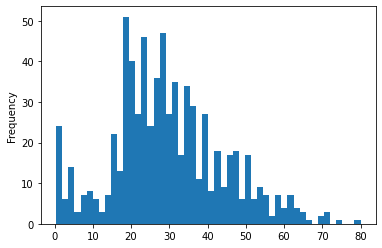

In [18]:
train['Age'].plot(kind='hist', bins=50);

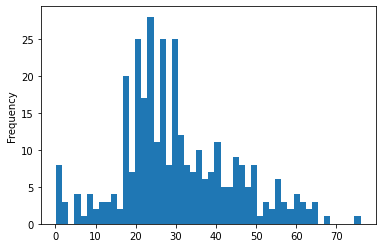

In [19]:
test['Age'].plot(kind='hist', bins=50);

Based on the graphic above, impute the median to the missing value.

In [20]:
train_test_data = [train, test]
for i in train_test_data:
    i['Age'].fillna(i['Age'].median(), inplace=True)

In [21]:
print('Missing Values in Training Data')
print(train.isnull().sum())
print('Missing Values in Testing Data')
print(test.isnull().sum())

Missing Values in Training Data
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
Missing Values in Testing Data
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


Based on the information above, we know that we have successfully overcome the missing value of <font color=blue>__Age__</font> column.

Now, check how many times each unique value of <font color=blue>__Embarked__</font> column appear.

In [22]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Based on the information that we've got, let the mode impute the missing value.

In [23]:
modus_train_embarked = train['Embarked'].mode()[0]

In [24]:
train['Embarked'].fillna(modus_train_embarked, inplace = True)
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Based on the information above, we know that we have successfully overcome the missing value of <font color=blue>__Embarked__</font> column. Now, to simplify the analysis process, replace each value of this column to discrete number.

In [25]:
for i in train_test_data:
    i['Embarked'] = i['Embarked'].map({
        'S':0,
        'Q':1,
        'C':2
    })
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,0
2,1,1,female,38.0,1,0,71.2833,2
3,1,3,female,26.0,0,0,7.9250,0
4,1,1,female,35.0,1,0,53.1000,0
5,0,3,male,35.0,0,0,8.0500,0


Now, since there is only one missing value for <font color=blue>__Fare__</font> column, let's just impute the mode of this column to fill the missing value.

In [26]:
modus_test_fare = test['Fare'].mode()[0]
test['Fare'].fillna(modus_test_fare, inplace = True)

Let's check once again whether all the missing value has been overcome or not.

In [27]:
print('Missing Values pada Data Training')
print(train.isnull().sum())
print('Missing Values pada Data Testing')
print(test.isnull().sum())

Missing Values pada Data Training
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Missing Values pada Data Testing
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Based on the information above, we can see that all the missing value has been overcome. Now, similar to Embarked column, replace each value of <font color=blue>__Sex__</font> column to discrete number to simplify the analysis process.

In [28]:
for i in train_test_data:
    i['Sex'] = i['Sex'].map({
        'female':0,
        'male':1
    })
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,2
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


Now, we want to know the tendency to survive of the passengers based on their age.

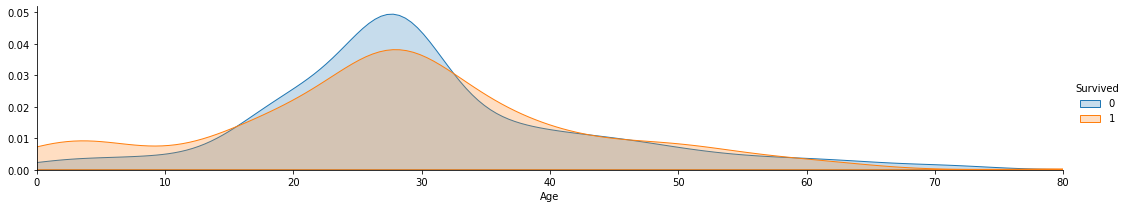

In [29]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

Based on the graphic above, we can conclude that:
- Passengers younger than 15 and older than 32/33 are more likely to survive
- Passengers with the age in the range 15-33 and older than 60 has lower chance to survive

Now, transform the numerical data into categorical data.

In [30]:
for i in train_test_data:
    i.loc[ i['Age'] <= 15, 'Age'] = 0 # 16 legal age di UK
    i.loc[(i['Age'] > 15) & (i['Age'] <= 25), 'Age'] = 1
    i.loc[(i['Age'] > 25) & (i['Age'] <= 35), 'Age'] = 2
    i.loc[(i['Age'] > 35) & (i['Age'] <= 64), 'Age'] = 3
    i.loc[i['Age'] > 64, 'Age'] = 4

Additional information:
- 0: Child
- 1: Young
- 2: Adult
- 3: Mid-Age
- 4: Elderly

Consideration:
- 16 is the legal age in the England
- Someone who is older than 65 is considered as the elderly in England

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,1.0,1,0,7.2500,0
2,1,1,0,3.0,1,0,71.2833,2
3,1,3,0,2.0,0,0,7.9250,0
4,1,1,0,2.0,1,0,53.1000,0
5,0,3,1,2.0,0,0,8.0500,0


Now, we want to know the tendency to survive of the passengers based on their ticket fare.

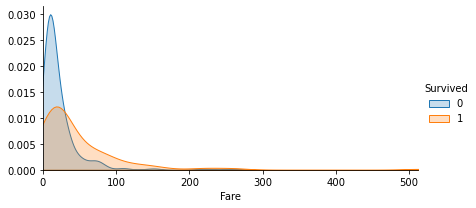

In [32]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 2)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

Based on the graphic above, we can conclude that *passengers with cheaper ticket fare are more likely not to survive than passengers with more expensive ticket fare.*

Now, similar to the Age feature, transform the data type of this feature into categorical data.

In [33]:
for i in train_test_data:
    i.loc[ i['Fare'] <= 17, 'Fare'] = 0
    i.loc[(i['Fare'] > 17) & (i['Fare'] <= 30), 'Fare'] = 1
    i.loc[(i['Fare'] > 30) & (i['Fare'] <= 100), 'Fare'] = 2
    i.loc[i['Fare'] > 100, 'Fare'] = 3

Consideration:
- The average ticket price for an adult first-class passenger: 30-870
- The average ticket price for an adult second-class passenger: 13
- The average ticket price for an third-class passenger: 3-7

In [34]:
train.shape, test.shape

((891, 8), (418, 7))

<font color=blue>__SibSp__</font> represents how many siblings/spouse that is with the passenger, and <font color=blue>__Parch__</font> represents how many children that is with the passenger. These two features represent how many family member that is with the passenger. Now, let's create a new feature, <font color=blue>__Family_Size__</font>, that represents the number of family member that is with the passenger.

In [35]:
for i in train_test_data:
    i['Family_Size'] = i['SibSp'] + i['Parch']

Since <font color=blue>__SibSp__</font> and <font color=blue>__Parch__</font> have similar representation with <font color=blue>__Family_Size__</font>, then drop those two features.

In [36]:
for i in train_test_data:
    i.drop(['SibSp', 'Parch'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
PassengerId,,,,,,,
1,0,3,1,1.0,0.0,0,1
2,1,1,0,3.0,2.0,2,1
3,1,3,0,2.0,0.0,0,0
4,1,1,0,2.0,2.0,0,1
5,0,3,1,2.0,0.0,0,0


In [37]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Family_Size
PassengerId,,,,,,
892,3,1,2.0,0.0,1,0
893,3,0,3.0,0.0,0,1
894,2,1,3.0,0.0,1,0
895,3,1,2.0,0.0,0,0
896,3,0,1.0,0.0,0,2


Now, let's see the correlation between each feature to check whether there is still any feature that needs to be dropped.

In [38]:
train.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
Survived,1.000000,-0.338481,-0.543351,-0.072168,0.292884,0.167675,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.288249,-0.693736,-0.162098,0.065997
Sex,-0.543351,0.131900,1.000000,0.093403,-0.216932,-0.108262,-0.200988
Age,-0.072168,-0.288249,0.093403,1.000000,0.066293,0.018754,-0.247297
Fare,0.292884,-0.693736,-0.216932,0.066293,1.000000,0.183935,0.415087
Embarked,0.167675,-0.162098,-0.108262,0.018754,0.183935,1.000000,-0.066516
Family_Size,0.016639,0.065997,-0.200988,-0.247297,0.415087,-0.066516,1.000000


Based on the result above, the strongest correlation appears in <font color=blue>__Fare__</font> and <font color=blue>__Pclass__</font> features. That makes sense because the fare of the ticket determines the seat of the passenger, and it indirectly determines the class that the passenger took in the ship. But, both <font color=blue>__Fare__</font> and <font color=blue>__Pclass__</font> features are still gonna be kept in the dataset.

Now, define a function that will show a comparison bar chart for each feature that also shows us whether a particular class most likely to survive or not.

In [39]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

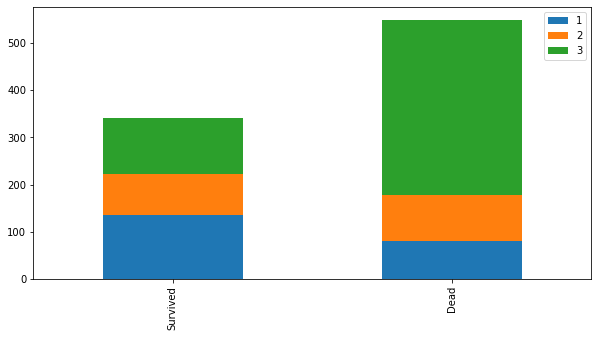

In [40]:
bar_chart('Pclass')

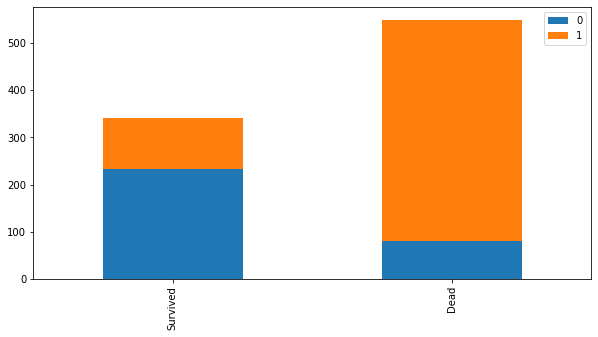

In [41]:
bar_chart('Sex')

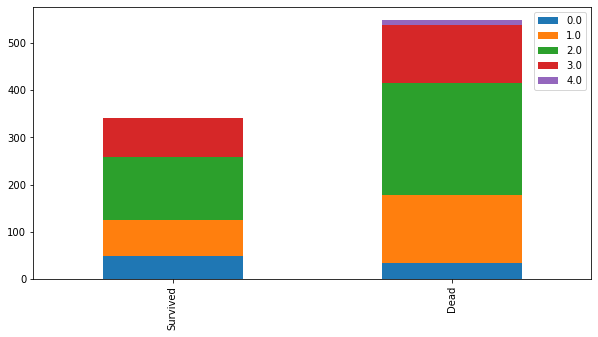

In [42]:
bar_chart('Age')

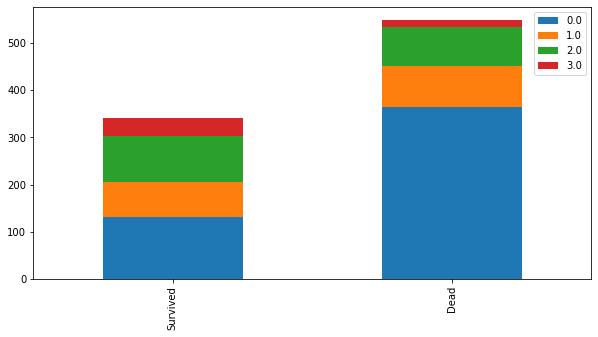

In [43]:
bar_chart('Fare')

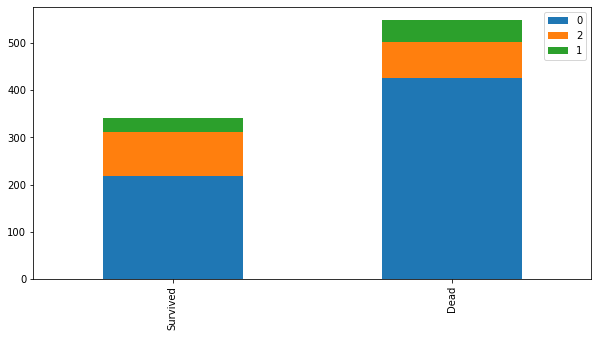

In [44]:
bar_chart('Embarked')

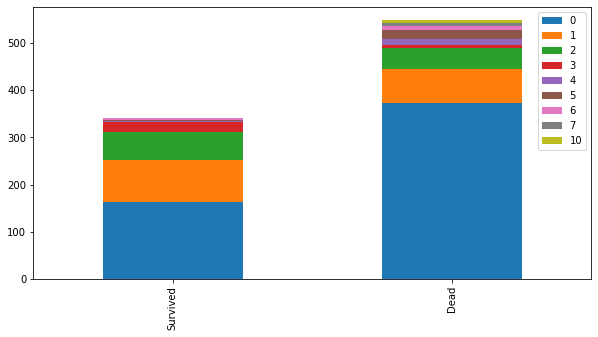

In [45]:
bar_chart('Family_Size')

In [46]:
print(train.groupby(['Survived','Family_Size']).size())

Survived  Family_Size
0         0              374
          1               72
          2               43
          3                8
          4               12
          5               19
          6                8
          7                6
          10               7
1         0              163
          1               89
          2               59
          3               21
          4                3
          5                3
          6                4
dtype: int64


From the information above we can conclude that:
- The passengers from __Class 3 are more likely not survived__ during the accident, while the passengers from Class 1 are more likely survived during the accident. *It is possible to happen because it might be the part of the ship that are drowned first was filled by the passengers from Class 3.*
- __Female passengers are more likely survived__ during the accident than the male passengers. *This happened because in safety procedures in the event of an accident, female passengers are more prioritized to be evacuated than the male passengers.*
- __Every class in Age feature is more likely not survived__ during the accident.
- Passengers with __cheaper fare are more likely not survived__ than the other three classes. *This makes sense because the cheap fare are mostly for those passengers who are in Class 3 that more likely also not survived.*
- The passengers that __departed from Cherbourg are more likely to survive__ than the other two classes (Southampton and Queenstown)
- The passengers __with no family are more likely not survived__, while the passengers with family are more likely survived during the accident. 

# Data Preparation 1

As the initial process of model construction, prepare all the training data, testing data, and target variable. Since we are going to predict which passenger will survive, therefore set the <font color=blue>__Survived__</font> feature as the target variable.

In [47]:
X_train = train.drop(['Survived'], axis = 1)
X_test = test
y = train['Survived']

Check whether the number of data we have equals to the numbers of data we have for the target variable.

In [48]:
X_train.shape, y.shape

((891, 6), (891,))

# Modelling

Import all the library that will be needed in the process of model construction.

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn.ensemble import RandomForestClassifier #RF
from sklearn.naive_bayes import GaussianNB #NB
from sklearn.svm import LinearSVC #svm
from sklearn.linear_model import LogisticRegression #LR

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Now, let's conduct the predictive modelling.

## 1. Logistic Regression

First, construct and train Logistic Regression model using the dataset that we have. After that, calculate the accuracy score of this training model.

In [50]:
lr = LogisticRegression()
lr.fit(X_train,y)
lr_score_train = lr.score(X_train,y)
print(round(lr_score_train*100, 2))

80.13


The accuracy score is around <font color=red>__80%__</font>. Now, let's implement the model to the testing data.

In [51]:
lr_pred = lr.predict(X_test)

In [52]:
X_test1 = test.reset_index()
output_lr = pd.DataFrame({'PassengerId': X_test1.PassengerId, 'Survived': lr_pred})
output_lr

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 2. kNN

For kNN, let's use the Grid Search to get the information which best parameter that we can use to optimize this model.

In [53]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'brute'],
            'metric': ['euclidean', 'manhattan', 'mahalanobis', 'minkowski']}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy')
# recall binary

grid_knn.fit(X_train, y)
knn_score_train = grid_knn.score(X_train,y)
print(round(knn_score_train*100, 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 650, in sklearn.neighbors._dist_metri

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 650, in sklearn.neighbors._dist_metri

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 650, in sklearn.neighbors._dist_metri

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  war

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  war

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  war

84.4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


We have got the accuracy score is around <font color=red>__84%__</font>. Now, let's implement the model to the testing data.

In [54]:
knn_pred = grid_knn.predict(X_test)
output_knn = pd.DataFrame({'PassengerId': X_test1.PassengerId, 'Survived': knn_pred})
output_knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Let's see which best parameter of this model for predicting our dataset.

In [55]:
grid_knn.best_params_

{'algorithm': 'brute',
 'metric': 'mahalanobis',
 'n_neighbors': 6,
 'weights': 'uniform'}

Therefore, for the best result of this model to predict our data, use the parameter that mentioned above.

# 3. Decision Tree

Construct and train Decision Tree model using the dataset that we have. After that, calculate the accuracy score of this training model.

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y)
dt_score_train = dt.score(X_train,y)
print(round(dt_score_train*100, 2))

87.32


We have got the accuracy score is around <font color=red>__87%__</font>. Now, let's implement the model to the testing data.

In [57]:
dt_pred = dt.predict(X_test)
output_dt = pd.DataFrame({'PassengerId': X_test1.PassengerId, 'Survived': dt_pred})
output_dt

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Using this model, we can see which feature of this dataset that has a huge impact to the model.

In [58]:
feature_imp = {'Feature': list(X_train.columns), 'Feature Importances': list(dt.feature_importances_)}
feature_imp = pd.DataFrame(feature_imp)
print(feature_imp)

       Feature  Feature Importances
0       Pclass             0.167294
1          Sex             0.465951
2          Age             0.089052
3         Fare             0.059045
4     Embarked             0.035498
5  Family_Size             0.183159


Based on the result above, the importance of each feature is ordered from the most important to the least important as follows: <font color=darkcyan>__Sex, Family_Size, Pclass, Age, Fare, and Embarked__</font>.

# 4. Random Forest

For Random Forest, let's use the Grid Search to get the information which best parameter that we can use to optimize this model.

In [59]:
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
            'criterion': ['gini', 'entropy'],
            'max_features': ['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy')
# recall binary

grid_rf.fit(X_train, y)
rf_score_train = grid_rf.score(X_train,y)
print(round(rf_score_train*100, 2))

86.98


We have got the accuracy score around <font color=red>__87%__</font>. Now, let's implement the model to the testing data.

In [60]:
rf_pred = grid_rf.predict(X_test)
output_rf = pd.DataFrame({'PassengerId': X_test1.PassengerId, 'Survived': rf_pred})
output_rf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Let's see which best parameter of this model for predicting our dataset.

In [61]:
grid_rf.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}

Therefore, for the best result of this model to predict our data, use the parameter that mentioned above.

# 5. SVM

Construct and train SVM model using the dataset that we have. After that, calculate the accuracy score of this training model.

In [62]:
svm = LinearSVC()
svm.fit(X_train,y)
svm_score_train = svm.score(X_train, y)
print(round(svm_score_train*100, 2))

80.36


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


We have got the accuracy score around <font color=red>__80%__</font>. Now, let's implement the model to the testing data.

In [63]:
svm_pred = svm.predict(X_test)
output_svm = pd.DataFrame({'PassengerId': X_test1.PassengerId, 'Survived': svm_pred})
output_svm

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 6. Naive Bayes

For Naive Bayes, let's use the Grid Search to get the information which best parameter that we can use to optimize this model.

In [64]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
nb = GaussianNB()
grid_nb = GridSearchCV(nb, param_grid=param_grid, scoring='accuracy')
# recall binary

grid_nb.fit(X_train, y)
nb_score_train = grid_nb.score(X_train,y)
print(round(nb_score_train*100, 2))

78.23


We have got the accuracy score around <font color=red>__78%__</font>. Now, let's implement the model to the testing data.

In [65]:
nb_pred = grid_nb.predict(X_test)
output_nb = pd.DataFrame({'PassengerId': X_test1.PassengerId, 'Survived': nb_pred})
output_nb

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Let's see which best parameter of this model for predicting our dataset.

In [66]:
grid_nb.best_params_

{'var_smoothing': 0.012328467394420659}

Therefore, for the best result of this model to predict our data is var_smoothing: 0.012328467394420659

# Data Preparation 2

Now, to be able to see how good our predictive model works, use cross validation and see the classification report.

# Cross Validation

Now, prepare the data, train the model, and implement the model to predict the testing data. Since Naive Bayes doesn't perform really well (compared to the other datasets), let's implement Cross Validation for this model.

In [67]:
X = train.drop(['Survived'], axis = 1)
y = train['Survived']
kf = KFold(n_splits = 10, shuffle=True, random_state = 0)
kf.get_n_splits(X)

nb = GaussianNB(var_smoothing= 0.012328467394420659)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        48
           1       0.85      0.79      0.81        42

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        54
           1       0.77      0.66      0.71        35

    accuracy                           0.79        89
   macro avg       0.78      0.76      0.77        89
weighted avg       0.78      0.79      0.78        89

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        53
           1       0.68      0.58      0.63        36

    accuracy                           0.72        89
   macro avg       0.71      0.70      0.70        89
weighted avg       0.72      0.72      0.71        89

              preci

From the result above, we get a better accuracy score than before, around <font color=red>__81%__</font>.. Now, let's construct the confusion matrix.

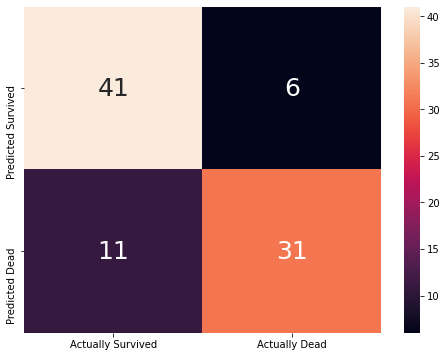

In [68]:
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = ['Predicted Survived', 'Predicted Dead'],
                  columns = ['Actually Survived', 'Actually Dead'])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 25});

From all the model that we have tried to predict our dataset, we get <font color=blue>__Random Forest__</font>  model as the model with the best accuracy score. So, for the submission file, let's use the Random Forest model instead of the others.

# Final Result

In [69]:
submission = pd.DataFrame({
    "PassengerId" : X_test1['PassengerId'],
    "Survived" : rf_pred
})
submission.to_csv('submission.csv', index=False)

In [70]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
